<a href="https://colab.research.google.com/github/capozzolicaluan/MSWEPtest/blob/main/spatial_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Limpar todas as variáveis
from IPython import get_ipython
get_ipython().magic('reset -sf')


In [82]:
# Importando as bibliotecas necessárias
import requests
import pandas as pd
import gc
from google.colab import data_table
import math
import os


# Liberar memória manualmente
_ = gc.collect()

In [83]:
def uneDataframes(df1, df2):

  df_completo = pd.concat([df1, df2], axis=1)

  if df_completo.shape[1] == 4:
    df_completo.columns = ['Estacao', 'Latitude', 'Longitude', 'Anual']
  elif df_completo.shape[1] == 15:
    df_completo.columns = ['Estacao','Latitude', 'Longitude','Jan','Feb','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
  else:
    print("Número de colunas não suportado")
    return

  return df_completo

In [84]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [85]:
from posixpath import join
file_path = "/content/drive/MyDrive/Colab/txts"

In [86]:
estacoes_lat_lon = pd.read_csv(join(file_path, "estacoes_lat_lon.txt"), sep = ';', header=None)

# Assigning column names to estacoes_lat_lon for clarity
estacoes_lat_lon.columns = ['Estacao', 'Latitude', 'Longitude']

In [87]:
lista_arquivos = os.listdir(join(file_path,"error_result"))

In [95]:
erros_dicionario = {}

for arquivo in lista_arquivos:
  erro_df = pd.read_csv(join(file_path,"error_result",arquivo), sep = ';')

  erro_df_final = uneDataframes(df1=estacoes_lat_lon, df2=erro_df)

  nome_base = os.path.splitext(arquivo)[0]

  # Adiciona ao dicionário
  erros_dicionario[nome_base] = erro_df_final

,Estacao,Latitude,Longitude,Jan,Feb,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,58040000,-23.2386,-45.3067,0.503553,-0.357307,0.257494,0.347272,0.300127,0.223318,-0.399946,-0.451470,-0.664607,0.033383,0.635891,0.209273
1,58204000,-22.8119,-45.1825,0.080668,0.085541,0.066044,0.141685,0.056957,-0.124147,-0.089790,-0.223283,-0.084204,-0.243910,0.102176,0.187059
2,58183000,-22.9117,-45.4700,0.362360,-0.136193,0.072260,0.407382,0.717708,-0.677227,0.384061,0.115093,0.612848,0.195364,-0.037099,0.287210
3,58380001,-22.1628,-43.2864,-0.085314,-0.115599,-0.169486,-0.732652,-0.020546,-2.656820,0.171448,0.048154,-0.280454,-0.180715,0.041171,0.122280
4,58405000,-22.3319,-43.1317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,58520000,-21.9667,-43.3744,0.246627,0.073337,-0.015054,0.190080,0.316042,-1.084130,-0.239191,0.106498,-0.545128,-0.092028,0.107439,0.406299
6,58530000,-22.2708,-44.3900,0.511858,0.301839,0.400851,0.366261,0.355125,0.371803,0.396616,0.480494,0.258576,0.211557,0.516425,0.614020
7,58550001,-22.0861,-43.8200,-0.828616,-0.499720,-0.093379,-6.443716,0.630624,-4.042667,0.034805,-0.118804,-0.858993,0.220468,0.550030,0.173541
8,58585000,-22.0844,-43.5589,-0.009546,0.141365,-0.019495,0.250251,0.437770,0.002466,0.376426,0.284946,-0.231658,0.083566,0.217181,0.200440
9,58680001,-21.6658,-42.0811,-0.644143,-0.245562,-0.214924,-0.400319,0.139349,0.033320,0.048248,0.154028,-0.048000,-0.148166,0.259471,0.151017


In [ ]:
# prompt: juntar o estacoes_lat_lon e index em um unico dataframe

import pandas as pd
# Resetting display options for data_table
data_table.disable_dataframe_rendering()

# Assigning column names to estacoes_lat_lon for clarity
estacoes_lat_lon.columns = ['Estacao', 'Latitude', 'Longitude']

# Resetting the index of the 'index' DataFrame to use 'Estacao' column for merging
index = index.reset_index()
index.rename(columns={'index': 'Estacao'}, inplace=True)

# Merging the two dataframes on the 'Estacao' column
merged_df = pd.merge(estacoes_lat_lon, index, on='Estacao')

# Displaying the merged dataframe using data_table
data_table.enable_dataframe_rendering()
display(merged_df)

,0,1,2
0,58040000,-23.2386,-45.3067
1,58204000,-22.8119,-45.1825
2,58183000,-22.9117,-45.4700
3,58380001,-22.1628,-43.2864
4,58405000,-22.3319,-43.1317
5,58520000,-21.9667,-43.3744
6,58530000,-22.2708,-44.3900
7,58550001,-22.0861,-43.8200
8,58585000,-22.0844,-43.5589
9,58680001,-21.6658,-42.0811


In [ ]:
# prompt: ler os nomes dos arquivos contidos no caminho file_path
for filename in os.listdir(join(file_path,"error_result")):
filename

In [ ]:
dados_hidro = pd.read_csv(join(file_path, "matriz_hidro.txt"), sep = ';')
dados_mswep = pd.read_csv(join(file_path, "matriz_mswep.txt"), sep = ';')

In [ ]:
for i in range(dados_mswep.shape[1]-1):
  indices = dados_mswep[ dados_mswep.iloc[:,(i+1)] < 0.2].index
  dados_mswep.iloc[indices,(i+1)] = 0

In [ ]:
for i in range(dados_hidro.shape[1]-1):
  indices = dados_hidro[ dados_hidro.iloc[:,(i+1)] < 0.2].index
  dados_hidro.iloc[indices,(i+1)] = 0

In [ ]:
erro_me = [None] * (dados_mswep.shape[1]-1)
erro_mae = [None] * (dados_mswep.shape[1]-1)
erro_mse = [None] * (dados_mswep.shape[1]-1)
erro_rmse = [None] * (dados_mswep.shape[1]-1)

for estacao_i in range(dados_mswep.shape[1]-1):

  sem_nan = dados_hidro.iloc[:, estacao_i+1].dropna().index

  hidro_sem_nan = dados_hidro.iloc[sem_nan,estacao_i+1]
  mswep_sem_nan = dados_mswep.iloc[sem_nan,estacao_i+1]

  erro_me[estacao_i] = he.me(simulated_array=mswep_sem_nan, observed_array=hidro_sem_nan)
  erro_mae[estacao_i] = he.mae(simulated_array=mswep_sem_nan, observed_array=hidro_sem_nan)
  erro_mse[estacao_i] = he.mse(simulated_array=mswep_sem_nan, observed_array=hidro_sem_nan)
  erro_rmse[estacao_i] = he.rmse(simulated_array=mswep_sem_nan, observed_array=hidro_sem_nan)

  print(estacao_i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


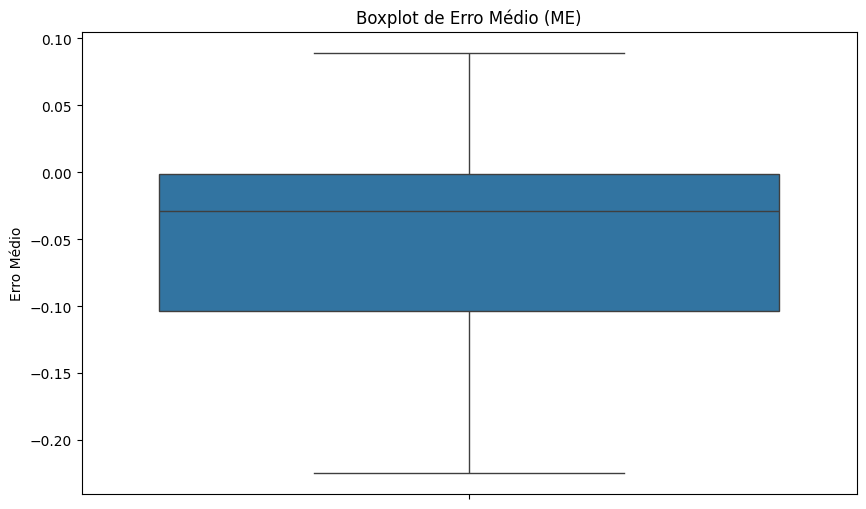

In [ ]:
# prompt: criar um boxplot com erro_me

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=erro_me)
plt.title('Boxplot de Erro Médio (ME)')
plt.ylabel('Erro Médio')
plt.show()
